# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Light-shift-Calculations" data-toc-modified-id="Light-shift-Calculations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Light shift Calculations</a></div><div class="lev2 toc-item"><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></div><div class="lev3 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev3 toc-item"><a href="#Preferences" data-toc-modified-id="Preferences-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Preferences</a></div><div class="lev2 toc-item"><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></div><div class="lev3 toc-item"><a href="#powerFromFrequency(frequency,-waist,-lightWavelength,-latticeWavelength)" data-toc-modified-id="powerFromFrequency(frequency,-waist,-lightWavelength,-latticeWavelength)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>powerFromFrequency(frequency, waist, lightWavelength, latticeWavelength)</a></div><div class="lev3 toc-item"><a href="#trapFrequency(power,-waist,-lightWavelength,-latticeWavelength)" data-toc-modified-id="trapFrequency(power,-waist,-lightWavelength,-latticeWavelength)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>trapFrequency(power, waist, lightWavelength, latticeWavelength)</a></div><div class="lev3 toc-item"><a href="#trapDepth(power,-waist,-lightWavelength)" data-toc-modified-id="trapDepth(power,-waist,-lightWavelength)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>trapDepth(power, waist, lightWavelength)</a></div><div class="lev3 toc-item"><a href="#scatterRate(power,-waistAtTrap,-lightWavelength)" data-toc-modified-id="scatterRate(power,-waistAtTrap,-lightWavelength)-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>scatterRate(power, waistAtTrap, lightWavelength)</a></div><div class="lev3 toc-item"><a href="#Tweezer-Depth" data-toc-modified-id="Tweezer-Depth-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Tweezer Depth</a></div><div class="lev3 toc-item"><a href="#Tweezer+Lattice-Depth" data-toc-modified-id="Tweezer+Lattice-Depth-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Tweezer+Lattice Depth</a></div><div class="lev3 toc-item"><a href="#Tweezer-Frequency" data-toc-modified-id="Tweezer-Frequency-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Tweezer Frequency</a></div><div class="lev3 toc-item"><a href="#Lattice-+-Tweezer" data-toc-modified-id="Lattice-+-Tweezer-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Lattice + Tweezer</a></div><div class="lev2 toc-item"><a href="#Calculations" data-toc-modified-id="Calculations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculations</a></div>

# Light shift Calculations

**These calculations come from the following paper:**  
https://arxiv.org/pdf/physics/9902072v1.pdf  
OPTICAL DIPOLE TRAPS FOR NEUTRAL ATOMS  
Rudolf Grimm and Matthias Weidemu¨ller 


## Setup

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Preferences

In [17]:
# set matplotlib plot defaults :D
# These values are nice for a dark theme.
%matplotlib inline
mpl.rcParams['text.color'] = '#ffffff'
mpl.rcParams['figure.edgecolor'] = '#ffffff'
mpl.rcParams['xtick.color'] = '#ffffff'
mpl.rcParams['ytick.color'] = '#ffffff'
mpl.rcParams['figure.facecolor'] = '#000000'
mpl.rcParams['axes.facecolor'] = '#0a0a0a'
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.labelcolor'] = '#ffffff'
mpl.rcParams['grid.color'] = '#aaaaff'
mpl.rcParams['axes.edgecolor'] = '#ffffff'
mpl.rcParams['legend.facecolor'] = '#0a0a0a'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False

## Functions

### powerFromFrequency(frequency, waist, lightWavelength, latticeWavelength)

Assuming a gaussian beam and pi polarization, we have
$$
Power \equiv P\{\omega_t\} = -\frac{(2\pi)^2 mw_{\text{beam}}^2\omega_{\text{t}}^2\lambda^2}{8c^2\bigg(2 \frac{\Gamma_{D2}}{\omega_{D2}^3*\Delta_{D2}} + \frac{\Gamma_{D1}}{\omega_{D1}^3*\Delta_{D1}}\bigg)}
$$

In [4]:
def powerFromFrequency(frequency, waist, lightWavelength, latticeWavelength):    
    import numpy as np
    ### constants
    # in kg
    mass = 1.443*10**(-25)
    # in Hz
    d1TransitionFrequency = 384.2*10**12
    d2TransitionFrequency = 377.1*10**12
    c = 2.998*10**8
    # linewidth is equivalent to the 
    d1LineWidth = 36.1*10**6
    d2LineWidth = 38.11*10**6
    # from inputs & constants
    detuningFromD1 = d1TransitionFrequency - c / lightWavelength
    detuningFromD2 = d2TransitionFrequency - c / lightWavelength
    # calculation
    power = (((2*np.pi)**2 * mass * (waist**2) * (2*np.pi*frequency)**2*(latticeWavelength**2)) 
            / (8 * (c**2)* (2 * d2LineWidth/(d2TransitionFrequency**3*detuningFromD2) 
                                       + (d1LineWidth/(d1TransitionFrequency**3*detuningFromD1)))))
    return power

### trapFrequency(power, waist, lightWavelength, latticeWavelength)

We have
$$
\text{trap frequency} \equiv \nu_t = \frac{1}{\lambda_t} \sqrt{\frac{2D}{m_{rb}}}= \sqrt{\frac{8 c^2  P}{\lambda_t^2m_{rb}w_{waist}^2(2\pi)^4}\bigg(\frac{2\Gamma_{D2}}{\nu_{D2}^3\Delta_{D2}} + \frac{\Gamma_{D1}}{\nu_{D1}^3\Delta_{D1}}  \bigg)}
$$

In [5]:
def trapFrequency(power, waist, lightWavelength, latticeWavelength):
    mass = 1.443*10**(-25)
    depth = trapDepth(power, waist, lightWavelength)
    frequency = (1 /  latticeWavelength) * np.sqrt(2*depth / mass)
    return frequency



### trapDepth(power, waist, lightWavelength)

Assuming a Gaussian Beam, we have
$$
\text{Depth} \equiv D = \frac{4 c^2  P}{w_{waist}^2(2\pi)^4}\bigg(\frac{2\Gamma_{D2}}{\nu_{D2}^3\Delta_{D2}} + \frac{\Gamma_{D1}}{\nu_{D1}^3\Delta_{D1}}  \bigg)
$$

In [6]:
def trapDepth(power, waist, lightWavelength):
    """
    Assumes PI polarization (exchange 2->2+P and 1->1-P)
    """
    # in meters/second
    c = 2.998*10**8
    # in joule-seconds
    h = 6.626 * 10**-34
    # in Hz
    d1TransitionFrequency = 384.2*10**12
    d2TransitionFrequency = 377.1*10**12
    # natural linewidth is equivalent to the decay rate
    d1LineWidth = 36.1*10**6
    d2LineWidth = 38.11*10**6
    detuningFromD1 = d1TransitionFrequency - c / lightWavelength
    detuningFromD2 = d2TransitionFrequency - c / lightWavelength
    chi = (d1LineWidth/(d1TransitionFrequency**3 * detuningFromD1) + 2 * d2LineWidth / (d2TransitionFrequency**3 * detuningFromD2))
    depth = ((4 * c**2 * power) / (waist**2 * (2*np.pi)**4)) * chi
    return depth
      

### scatterRate(power, waistAtTrap, lightWavelength)

$$
\text{Scattering Rate} \equiv \Gamma_{\text{sc}} = \frac{4c^2P}{\hbar w^2(2\pi)^5}\bigg(\frac{2 \Gamma_{D2}^2}{\Delta_{D2}^2 \nu_{D2}^3}+\frac{\Gamma_{D1}^2}{\Delta_{D2}^2 \nu_{D2}^3}\bigg)
$$

In [7]:
def scatterRate(power, waist, lightWavelength):
    # in meters/second
    c = 2.998*10**8
    # in Hz
    nuD1 = 384.2*10**12
    nuD2 = 377.1*10**12
    # natural linewidth is equivalent to the decay rate
    gammaD1 = 36.1*10**6
    gammaD2 = 38.11*10**6
    
    deltaD1 = nuD1 - c / lightWavelength
    deltaD2 = nuD2 - c / lightWavelength
    hbar = 1.054*10**-34
    scatteringRate = (c**2 * 4 * power / (hbar * waist**2)*(2 * np.pi)**(-5)
                    * (2 * gammaD2**2 / (deltaD2**2*nuD2**3) 
                       + gammaD1**2 / (deltaD1**2*nuD1**3)))
    return scatteringRate    

### Tweezer Depth

In [45]:
def tweezerDepth(power, waist, wavelength):
    mass = 1.443*10**(-25)
    # in Hz
    nuD1 = 384.2*10**12
    nuD2 = 377.1*10**12
    c = 2.998*10**8
    # linewidth is equivalent to the 
    gammaD1 = 36.1*10**6
    gammaD2 = 38.11*10**6
    # from inputs & constants
    deltaD1 = nuD1 - c / wavelength
    deltaD2 = nuD2 - c / wavelength
    # calculation
    chi = (2 * gammaD2 / (deltaD2 * nuD2**3) + gammaD1 / (deltaD1 * nuD1**3))
    depth = c**2 * power / ((2*np.pi)**4*waist**2) * chi
    return depth

In [51]:
intensity = 3.185 * 10**11 * 0.00715
waist = 707*10**-9
power = intensity * waist**2 * np.pi/2
print(tweezerDepth(power, waist, 850*10**-9) / (6.626*10**-34 * 10**6))

24.432841746803753


### Tweezer+Lattice Depth

In [100]:
def tweezerPlusLatticeDepth(tweezerPower, tweezerWaist, tweezerWavelength, latticePower, latticeWaist, 
                            latticeLightWavelength, latticeTrapWavelength, z, latticePhase):
    mass = 1.443*10**(-25)
    # in Hz
    nuD1 = 384.2*10**12
    nuD2 = 377.1*10**12
    c = 2.998*10**8
    # linewidth is equivalent to the 
    gammaD1 = 36.1*10**6
    gammaD2 = 38.11*10**6
    # from inputs & constants
    deltaD1Tweezer = nuD1 - c / tweezerWavelength
    deltaD2Tweezer = nuD2 - c / tweezerWavelength
    deltaD1Lattice = nuD1 - c / latticeLightWavelength
    deltaD2Lattice = nuD2 - c / latticeLightWavelength
    # calculation
    chiTweezer = (2 * gammaD2 / (deltaD2Tweezer * nuD2**3) + gammaD1 / (deltaD1Tweezer * nuD1**3))
    chiLattice = (2 * gammaD2 / (deltaD2Lattice * nuD2**3) + gammaD1 / (deltaD1Lattice * nuD1**3))
    
    commonFactor = c**2/(2*np.pi)**4
    tweezerRayleighRange = np.pi * tweezerWaist**2 / tweezerWavelength
    tweezerDynamicWaist = tweezerWaist * np.sqrt(1 + (z/tweezerRayleighRange)**2)
    tweezerDepth = commonFactor * tweezerPower * chiTweezer / tweezerDynamicWaist**2
    latticeDepth = commonFactor * 4 * latticePower * chiLattice / latticeWaist**2 * (np.cos(2*np.pi / latticeTrapWavelength * z + latticePhase))**2
    return tweezerDepth + latticeDepth
    

### Tweezer Frequency

In [48]:
def tweezerFrequency(power, waist, wavelength):
    mass = 1.443*10**(-25)
    # in Hz
    nuD1 = 384.2*10**12
    nuD2 = 377.1*10**12
    c = 2.998*10**8
    # linewidth is equivalent to the 
    gammaD1 = 36.1*10**6
    gammaD2 = 38.11*10**6
    # from inputs & constants
    deltaD1 = nuD1 - c / wavelength
    deltaD2 = nuD2 - c / wavelength
    # calculation
    chi = (2 * gammaD2 / (deltaD2 * nuD2**3) + gammaD1 / (deltaD1 * nuD1**3))
    nut = c * wavelength / ((2 * np.pi)**4 * waist**3) * np.sqrt(8 * power * chi / mass)
    return nut
    #omegat = np.sqrt(chi * (2 * power * c**2 * wavelength ** 2) / (mass * np.pi**6 * waist**6))
    #print(np.sqrt((c**2 / (mass * (2 * np.pi)**3)) * chi * (power * wavelength**2/(np.pi**3*waist**6))) / (2*np.pi))
    #return omegat/(2*np.pi)

In [50]:
intensity = 3.185 * 10**11 * 0.00715
waist = 707*10**-9
power = intensity * waist**2 * np.pi/2
print(str(tweezerFrequency(power, 700*10**-9, 850*10**-9)*10**-3) + "khz")

42.044483092khz


### Lattice + Tweezer

$$

$$

In [22]:
def latticeTweezerTrapFrequency(tweezerPower, tweezerWaist, tweezerLightWavelength, latticePower,
                                latticeWaist, latticeLightWavelength, latticeWavelength):
    mass = 1.443*10**(-25)
    # in Hz
    nuD1 = 384.2*10**12
    nuD2 = 377.1*10**12
    c = 2.998*10**8
    # linewidth is equivalent to the 
    gammaD1 = 36.1*10**6
    gammaD2 = 38.11*10**6
    # from inputs & constants
    deltaD1Tweezer = - nuD1 + c / tweezerLightWavelength
    deltaD2Tweezer = - nuD2 + c / tweezerLightWavelength
    deltaD1Lattice = - nuD1 + c / latticeLightWavelength
    deltaD2Lattice = - nuD2 + c / latticeLightWavelength
    # calculation
    chiTweezer = (2 * gammaD2 / (deltaD2Tweezer * nuD2**3) + gammaD1 / (deltaD1Tweezer * nuD1**3))
    chiLattice = (2 * gammaD2 / (deltaD2Lattice * nuD2**3) + gammaD1 / (deltaD1Lattice * nuD1**3))
    omegat = np.sqrt(-(c**2 / (mass * (2 * np.pi)**3)) * (chiLattice * 16 * np.pi * latticePower / (latticeWaist**2 * latticeWavelength**2)
                     + chiTweezer * tweezerPower * tweezerLightWavelength**2/(np.pi**3*tweezerWaist**6)))
    return omegat/(2*np.pi)
    

In [23]:
intensity = 3.185 * 10**11 * 0.00715
waist = 707*10**-9
power = intensity * waist**2 * np.pi/2
print(latticeTweezerTrapFrequency(power, waist, 0 * 1.4 * 0.8 * 0.8 * 0.9, 170*10**-6, 850*10**-9, 850*np.sqrt(2) * 10**-9))
print(trapFrequency(1.4*0.8*0.8*0.9, 170*10**-6, 850*10**-9, 850 * np.sqrt(2)*10**-9))
print(powerFromFrequency(70000, 170*10**-6, 850*10**-9, 850 * np.sqrt(2)*10**-9))

TypeError: latticeTweezerTrapFrequency() missing 1 required positional argument: 'latticeWavelength'

## Calculations

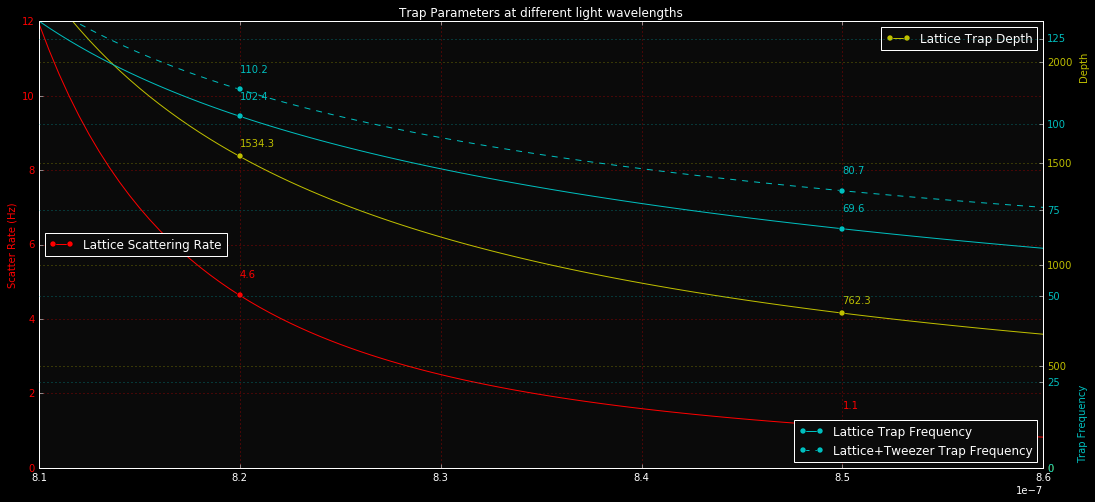

In [28]:
import numpy as np
# in hertz
desiredTrapFrequency = 75*10**3
# waist is in meters
trapWaist = 170*10**(-6)
h = 6.626*10**-34
# (in meters) This is different from the wavelength because of the bowtie configuration.
powerEstimate = 1.4 * 0.8 * 0.8 * 0.9
# 
tweezerWavelength = 850*10**-9
tweezerIntensity = 3.185 * 10**11 * 0.00715
tweezerWaist = 707*10**-9
tweezerPower = tweezerIntensity * tweezerWaist**2 * np.pi/2

lightWavelengths = np.linspace(810*10**-9, 860*10**-9, 101)
latticeWavelengths = np.sqrt(2) * lightWavelengths

trapFrequencies = trapFrequency(powerEstimate, trapWaist, lightWavelengths, latticeWavelengths)
totalTrapFrequencies = latticeTweezerTrapFrequency(power, waist, tweezerWavelength, powerEstimate, trapWaist, lightWavelengths, latticeWavelengths)
depths = trapDepth(powerEstimate, trapWaist, lightWavelengths)
scatterRates = scatterRate(powerEstimate, trapWaist, lightWavelengths)
index850 = np.where(lightWavelengths==850*10**-9)[0][0]
index820 = np.where(lightWavelengths==820*10**-9)[0][0]
fig, ax1 = plt.subplots()
plt.plot(lightWavelengths, scatterRates, 'r', marker='o', markevery=[index850, index820], label='Lattice Scattering Rate')
ax1.set_ylabel('Scatter Rate (Hz)', color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('r')
ax1.grid(color='r')
ax1.annotate("{:.1f}".format(scatterRates[index850]),
             xy=(lightWavelengths[index850], scatterRates[index850]+0.5), color='r')
ax1.annotate("{:.1f}".format(scatterRates[index820]),
             xy=(lightWavelengths[index820], scatterRates[index820]+0.5), color='r')
ax1.legend(loc=6)
# second plot
ax2 = ax1.twinx()
plt.plot(lightWavelengths, depths*10**-3/h, 'y', marker='o', markevery=[index850, index820], label='Lattice Trap Depth')
ax2.set_ylabel('Depth', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')
ax2.set_yticks(np.arange(0,2200,500))
ax2.grid(color='y')
ax2.set_ylim(0,2200)
ax2.yaxis.set_label_coords(1.035, 0.9)
ax2.annotate("{:.1f}".format(depths[index850]*10**-3/h),
             xy=(lightWavelengths[index850], depths[index850]*10**-3/h+50), color='y')
ax2.annotate("{:.1f}".format(depths[index820]*10**-3/h),
             xy=(lightWavelengths[index820], depths[index820]*10**-3/h+50), color='y')
ax2.legend(loc=1)
# third
ax3 = ax1.twinx()
plt.plot(lightWavelengths, trapFrequencies*10**-3, 'c', marker='o', markevery=[index850, index820], label='Lattice Trap Frequency')
plt.plot(lightWavelengths, totalTrapFrequencies*10**-3, 'c', linestyle='--', marker='o', markevery=[index850, index820], label='Lattice+Tweezer Trap Frequency')
ax3.set_ylabel('Trap Frequency', color='c')
for tl in ax3.get_yticklabels():
    tl.set_color('c')
ax3.set_yticks(np.arange(0,130,25))
ax3.grid(color='c')
ax3.set_ylim(0,130)
ax3.yaxis.set_label_coords(1.035, 0.1)
ax3.annotate("{:.1f}".format(trapFrequencies[index850]*10**-3),
             xy=(lightWavelengths[index850], trapFrequencies[index850]*10**-3+5), color='c')
ax3.annotate("{:.1f}".format(trapFrequencies[index820]*10**-3),
             xy=(lightWavelengths[index820], trapFrequencies[index820]*10**-3+5), color='c')
ax3.annotate("{:.1f}".format(totalTrapFrequencies[index850]*10**-3),
             xy=(lightWavelengths[index850], totalTrapFrequencies[index850]*10**-3+5), color='c')
ax3.annotate("{:.1f}".format(totalTrapFrequencies[index820]*10**-3),
             xy=(lightWavelengths[index820], totalTrapFrequencies[index820]*10**-3+5), color='c')


ax3.set_xlim(810*10**-9, 860*10**-9)
ax3.legend(loc=4)
plt.title('Trap Parameters at different light wavelengths')
plt.show();

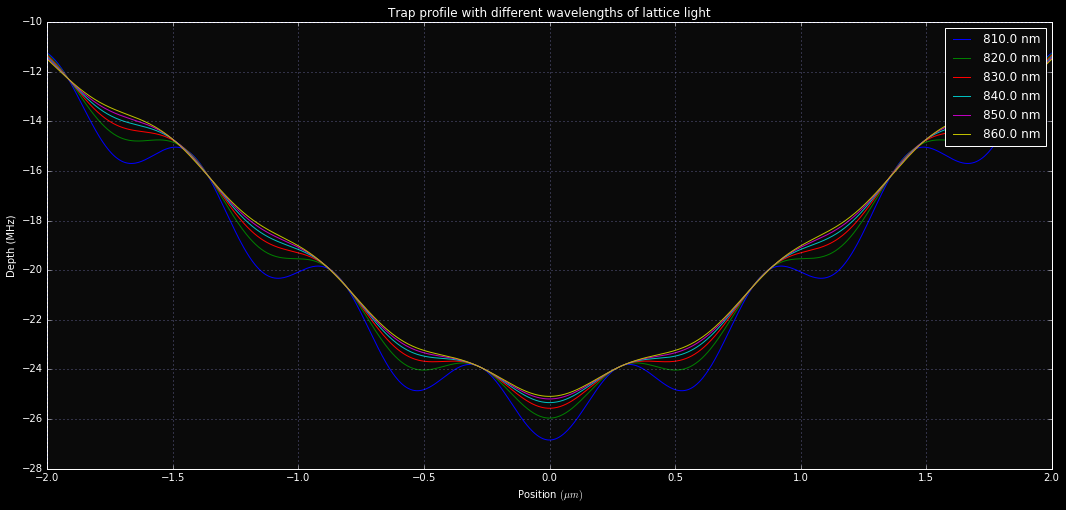

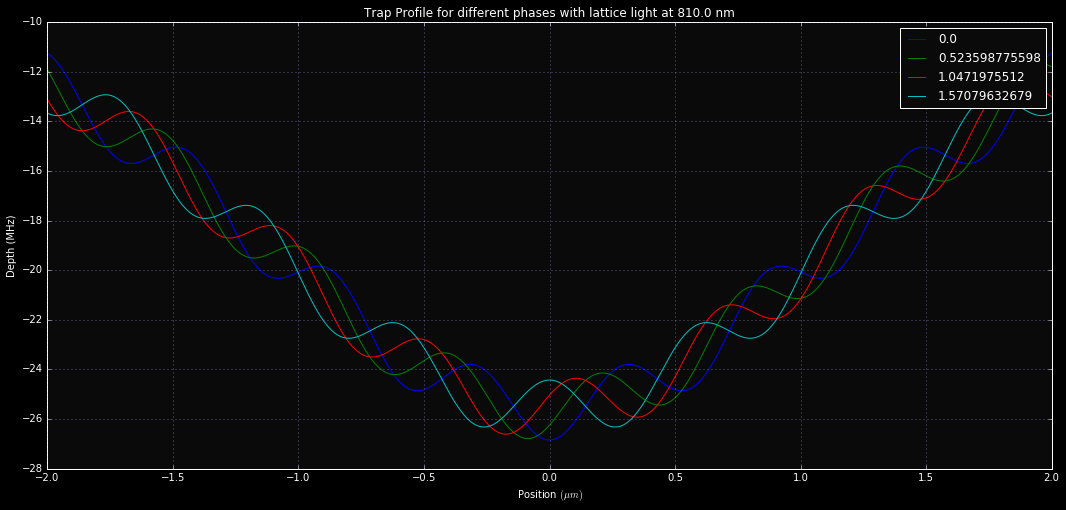

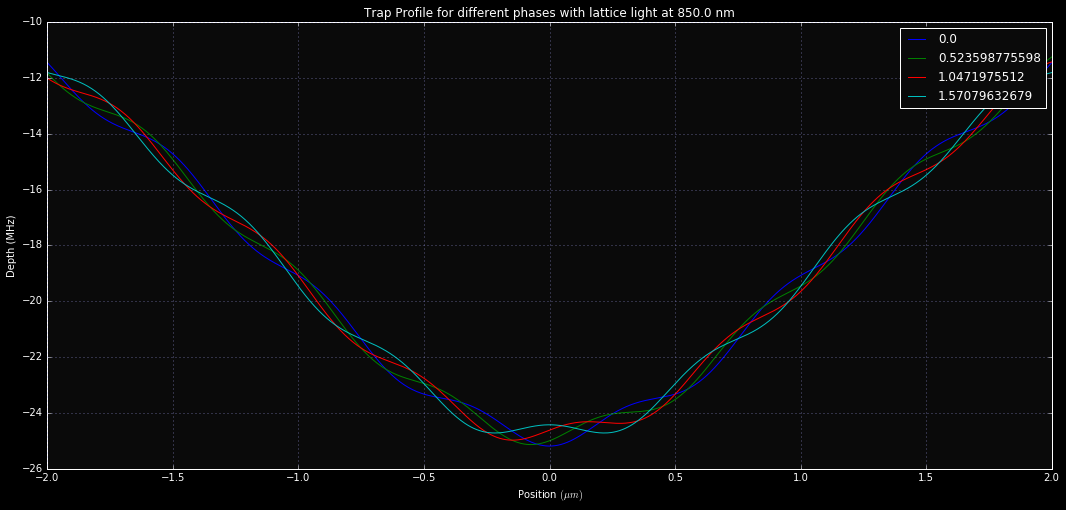

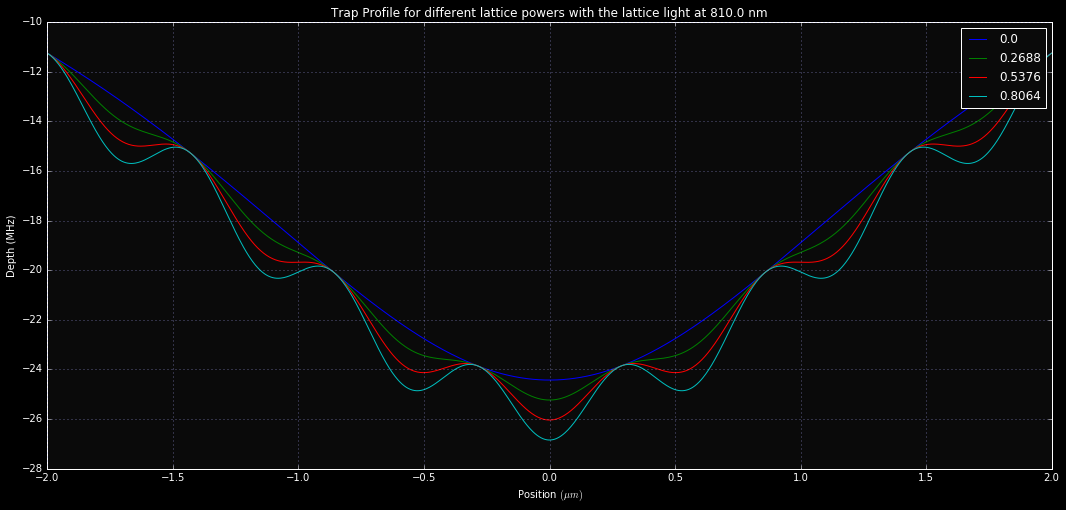

In [113]:
trapWaist = 170*10**(-6)
h = 6.626*10**-34
# (in meters) This is different from the wavelength because of the bowtie configuration.
powerEstimate = 1.4 * 0.8 * 0.8 * 0.9
# 
tweezerWavelength = 850*10**-9
tweezerIntensity = 3.185 * 10**11 * 0.00715
tweezerWaist = 707*10**-9
latticeWaist = 170*10**-6
tweezerPower = tweezerIntensity * tweezerWaist**2 * np.pi/2

positions = np.linspace(-2*10**-6, 2*10**-6, 1000)

lightWavelengths = np.linspace(810 * 10**-9, 860 * 10**-9, 6)
latticeWavelengths = np.sqrt(2) * lightWavelengths

depthProfile = np.zeros([len(lightWavelengths), len(positions)])

phases = np.linspace(0, np.pi/2, 4)

plt.figure(1)
for wavelengthInc in range(len(lightWavelengths)):
    depthProfile[wavelengthInc] = tweezerPlusLatticeDepth(tweezerPower, tweezerWaist, tweezerWavelength, powerEstimate,
                                                          latticeWaist, lightWavelengths[wavelengthInc], latticeWavelengths[wavelengthInc], positions, 0)
    plt.plot(positions * 10**6, -depthProfile[wavelengthInc] / (h * 10**6), label=str(lightWavelengths[wavelengthInc]*10**9) + ' nm')
plt.title('Trap profile with different wavelengths of lattice light')
plt.xlabel('Position $(\mu m)$')
plt.ylabel('Depth (MHz)')
plt.legend()

plt.figure(2)
for phaseInc in range(len(phases)):
    depthProfile[phaseInc] = tweezerPlusLatticeDepth(tweezerPower, tweezerWaist, tweezerWavelength, powerEstimate,
                                                          latticeWaist, lightWavelengths[0], latticeWavelengths[0], positions, phases[phaseInc])
    plt.plot(positions * 10**6, -depthProfile[phaseInc] / (h * 10**6), label=str(phases[phaseInc]))

plt.title('Trap Profile for different phases with lattice light at ' + str(lightWavelengths[0]*10**9) + ' nm')
plt.xlabel('Position $(\mu m)$')
plt.ylabel('Depth (MHz)')
plt.legend()

plt.figure(3)
for phaseInc in range(len(phases)):
    depthProfile[phaseInc] = tweezerPlusLatticeDepth(tweezerPower, tweezerWaist, tweezerWavelength, powerEstimate,
                                                          latticeWaist, lightWavelengths[-2], latticeWavelengths[-2], positions, phases[phaseInc])
    plt.plot(positions * 10**6, -depthProfile[phaseInc] / (h * 10**6), label=str(phases[phaseInc]))
plt.title('Trap Profile for different phases with lattice light at ' + str(lightWavelengths[-2]*10**9) + ' nm')
plt.xlabel('Position $(\mu m)$')
plt.ylabel('Depth (MHz)')
plt.legend();

plt.figure(4)
powers = np.linspace(0, powerEstimate, 4)
for powerInc in range(len(powers)):
    depthProfile[powerInc] = tweezerPlusLatticeDepth(tweezerPower, tweezerWaist, tweezerWavelength, powers[powerInc],
                                                     latticeWaist, lightWavelengths[0], latticeWavelengths[0], positions, 0)
    plt.plot(positions * 10**6, -depthProfile[powerInc] / (h * 10**6), label=str(powers[powerInc]))

plt.title('Trap Profile for different lattice powers with the lattice light at ' + str(lightWavelengths[0]*10**9) + ' nm')
plt.xlabel('Position $(\mu m)$')
plt.ylabel('Depth (MHz)')
plt.legend();

